# Cross-Validation with Linear Regression

[Kaggle Post source](https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression)


In [41]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import plotly
import plotly.express as px

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [42]:
# import Housing.csv
housing = pd.read_csv('./data/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
# number of obseravtions
len(housing)

545

In [44]:
# regression with only one data - area
df = housing.loc[:,['price', 'area']]
df.head(5)

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [45]:
# rescaling the columns
df_cols = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df

array([[1.        , 0.39656357],
       [0.90909091, 0.5024055 ],
       [0.90909091, 0.57113402],
       ...,
       [0.        , 0.13539519],
       [0.        , 0.08659794],
       [0.        , 0.15120275]])

In [46]:
df = pd.DataFrame(data=df, columns=df_cols)
# df.columns = df_cols
df.head()

,price,area
0,1.000000,0.396564
1,0.909091,0.502405
2,0.909091,0.571134
3,0.906061,0.402062
4,0.836364,0.396564


In [47]:
px.scatter(x = df['area'], y = df['price'])

In [48]:
# split into train and test
# df_tran, df_test = train_test_split(df, 0.7, 0.3)
X_train, X_test, y_train, y_test = train_test_split(
    df['area'], df['price'], test_size=0.3, random_state=10)


In [49]:
len(X_train)

381

In [50]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.56013746 0.33608247 0.12852234 0.45360825 0.10515464 0.16151203
 0.27972509 0.12371134 0.27147766 0.51656357 0.29896907 0.15876289
 0.00343643 0.06597938 0.10103093 0.37869416 0.29793814 0.67285223
 0.25085911 0.50515464 0.79381443 0.1257732  0.33676976 0.32646048
 0.21649485 0.29621993 0.14776632 0.20274914 0.14501718 0.18694158
 0.18969072 0.14776632 0.34020619 0.26460481 0.15697595 0.13402062
 0.12783505 0.10549828 0.25773196 0.32783505 0.09278351 0.26460481
 0.13608247 0.16426117 0.2233677  0.54776632 0.47216495 0.30309278
 0.02061856 0.29896907 0.49656357 0.05154639 0.3024055  0.65463918
 0.34123711 0.30584192 0.20274914 0.34020619 0.29896907 0.19587629
 0.16151203 0.13814433 0.35051546 0.42268041 0.21546392 0.13608247
 0.17938144 0.16838488 0.46391753 0.38357388 0.04639175 0.16467354
 0.36769759 0.71752577 0.31340206 0.07216495 0.23024055 0.08453608
 0.41443299 0.13676976 0.57113402 0.09072165 0.50515464 0.15876289
 0.26460481 0.10515464 0.09553265 0.05360825 0.22955326 0.19587629
 0.21649485 0.17525773 0.26116838 0.26460481 0.11271478 0.18969072
 0.47079038 0.09278351 0.16701031 0.32371134 0.09278351 0.33505155
 0.09278351 0.18350515 0.30584192 0.09278351 0.12439863 0.09278351
 0.16082474 0.15463918 0.26460481 0.26460481 0.04295533 0.30309278
 0.18487973 0.40082474 0.13402062 0.32783505 0.16426117 0.13676976
 0.21477663 0.33608247 0.12371134 0.12714777 0.16371134 0.24398625
 0.16975945 0.16804124 0.12989691 0.29539519 0.46391753 0.40206186
 0.32371134 0.03402062 0.1443299  0.29896907 0.21443299 0.14721649
 0.37835052 0.02061856 0.33333333 0.39793814 0.1257732  0.15120275
 0.16151203 0.09278351 0.16151203 0.12371134 0.22969072 0.2233677
 0.12714777 0.14089347 0.19587629 0.17044674 0.39656357 0.07106529
 0.09896907 0.16694158 0.29896907 0.03505155 0.13539519 0.19587629
 0.29896907 0.38556701 0.31958763 0.09278351 0.28865979 0.06872852
 0.12852234 0.67079038 0.34501718 0.29896907 0.12852234 0.34020619
 0.28522337 0.12164948 0.09278351 0.3443299  0.15120275 0.16426117
 0.20549828 0.03402062 0.16494845 0.43505155 0.41484536 0.19587629
 0.28178694 0.32371134 0.22199313 0.09278351 0.15931271 0.15120275
 0.32302405 0.11683849 0.29896907 0.43298969 0.12164948 0.17250859
 0.18570447 0.33608247 0.10927835 0.13745704 0.28522337 0.11340206
 0.09209622 0.40034364 0.26116838 0.29106529 0.19587629 0.22989691
 0.25773196 0.43986254 0.0361512  0.10103093 0.09690722 0.17938144
 0.11752577 0.55099656 0.59037801 0.59237113 0.13676976 0.22474227
 0.43642612 0.16054983 0.09278351 0.18213058 0.05670103 0.16151203
 0.44329897 0.50515464 0.60824742 0.45360825 0.16838488 0.41580756
 0.12439863 0.50515464 0.43986254 0.19656357 0.19587629 0.25223368
 0.15670103 0.3628866  0.10309278 0.29072165 0.20962199 0.5395189
 0.34845361 0.07814433 0.19587629 0.23024055 0.32371134 0.17250859
 0.03402062 0.12371134 0.13676976 0.15120275 0.13608247 0.10721649
 0.24054983 0.37353952 0.12714777 0.06185567 0.12371134 0.32130584
 0.42268041 0.26426117 0.14639175 0.25085911 0.16666667 0.34364261
 0.40206186 0.2        0.29072165 0.26460481 0.32989691 0.16804124
 0.09965636 0.29896907 0.23546392 0.0828866  0.27697595 0.18900344
 0.23092784 0.33195876 0.14398625 0.20274914 0.29896907 0.09278351
 0.31546392 0.44329897 0.22680412 0.18213058 0.29896907 0.23958763
 0.1532646  0.45360825 0.12852234 0.36769759 0.21649485 0.1443299
 0.22749141 0.01752577 0.16426117 0.06597938 0.1209622  0.10103093
 0.21924399 0.22749141 0.24398625 0.11340206 0.39656357 0.21649485
 0.29896907 0.13608247 0.28728522 0.12783505 0.0814433  0.28865979
 0.42061856 0.25773196 0.29896907 0.05841924 0.23024055 0.02405498
 0.07814433 0.29896907 0.32783505 0.19587629 0.16151203 0.29896907
 0.39683849 0.30171821 0.16426117 0.13738832 0.13676976 0.16838488
 0.29896907 0.03402062 0.25223368 0.12714777 0.3814433  0.20274914
 0.1862543  0.07539519 0.1395189  0.36769759 0.13608247 0.28522337
 0.47628866 0.37814433 0.10309278 0.10549828 0.12714777 0.09752577
 0.33333333 0.11092784 0.19725086 0.31642612 0.13292096 0.15120275
 0.29896907 0.13402062 0.16151203 0.05979381 0.15945017 0.13195876
 0.16975945 0.1257732  0.33676976 0.18556701 0.16151203 0.34020619
 0.44329897 0.16151203 0.36082474 0.38969072 0.13402062 0.18350515
 0.01278351 0.95876289 0.08453608].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

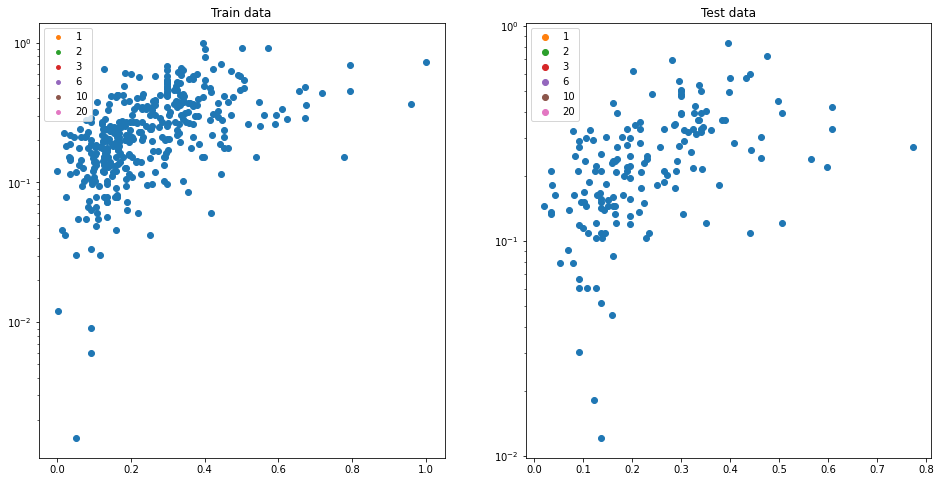

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=-2.48, test score=-3.0
Polynomial degree 2: train score=-2.48, test score=-3.0
Polynomial degree 3: train score=-2.48, test score=-3.0
Polynomial degree 6: train score=-2.48, test score=-3.0
Polynomial degree 10: train score=-2.48, test score=-3.0
Polynomial degree 20: train score=-2.48, test score=-3.0
